<a href="https://colab.research.google.com/github/14marcos1/artigos/blob/main/artigo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Copiar • Colar no Colab
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade

  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-pwnzodfl
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-pwnzodfl
  Resolved https://github.com/AlertaDengue/PySUS.git to commit fda2a296651ebf2e5909af6d96771f14fc4cc1bd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.7/385.7 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 

In [1]:
import pysus, pandas as pd

print("PySUS:", getattr(pysus, "__version__", "?"), "| pandas:", pd.__version__)

PySUS: 1.0.1 | pandas: 2.2.2


In [2]:
from pysus import SIH

sih = SIH().load()

# RD = AIH "reduzida" (mais comum para análises rápidas)
files = sih.get_files("RD", uf="MG", year=2025)

print("✅ Total de arquivos encontrados:", len(files))

# Tenta mostrar nomes/identificadores (varia por versão)
for i, f in enumerate(files[:12]):
    try:
        name = getattr(f, "name", None) or getattr(f, "filename", None) or str(f)
    except Exception:
        name = str(f)
    print(f"{i:02d} -> {name}")

✅ Total de arquivos encontrados: 12
00 -> RDMG2501
01 -> RDMG2502
02 -> RDMG2503
03 -> RDMG2504
04 -> RDMG2505
05 -> RDMG2506
06 -> RDMG2507
07 -> RDMG2508
08 -> RDMG2509
09 -> RDMG2510
10 -> RDMG2511
11 -> RDMG2512


In [3]:
from pysus import SIH
import pandas as pd

from pysus import SIH
import pandas as pd

sih = SIH().load()
files = sih.get_files("RD", uf="MG", year=2025)

alvo = [f for f in files if "RDMG2501" in str(getattr(f, "name", f)) or "RDMG2501" in str(f)]
print("🎯 Arquivo selecionado:", alvo[0] if alvo else "NÃO ENCONTRADO")

res = sih.download(alvo)  # retorna ParquetSet

# Tenta o caminho padrão: ParquetSet -> DataFrame
if hasattr(res, "to_dataframe"):
    df = res.to_dataframe()
else:
    # fallback: iterar e concatenar (caso res seja iterável)
    dfs = []
    for item in res:
        if hasattr(item, "to_dataframe"):
            dfs.append(item.to_dataframe())
        elif isinstance(item, pd.DataFrame):
            dfs.append(item)
    df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

print("✅ Linhas:", len(df), "| Colunas:", df.shape[1])
print("🧾 Primeiras colunas:", df.columns[:15].tolist())
df.head(3)

🎯 Arquivo selecionado: RDMG2501.dbc


RDMG2501.parquet: 100%|██████████| 444k/444k [00:27<00:00, 15.9kB/s]


✅ Linhas: 126429 | Colunas: 113
🧾 Primeiras colunas: ['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_MES_TO']


,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,310000,2025,01,07,60975737006435,3125140004998,1,35200000,310110,20230509,...,,1,0,0,0,0,0,0,0,0
1,310000,2025,01,07,60975737006435,3125140005031,1,35200000,310110,20220410,...,,0,0,0,0,0,0,0,0,0
2,310000,2025,01,07,60975737006435,3125140005075,1,35200000,310110,20240702,...,,1,0,0,0,0,0,0,0,0


In [4]:
import pandas as pd

print("✅ Registros:", len(df))
print("🧭 Colunas (15 primeiras):", df.columns[:15].tolist())

# Datas no SIH (NASC é data de nascimento; ANO/MES_CMPT = competência)
for col in ["NASC"]:
    if col in df.columns:
        nasc = pd.to_datetime(df[col].astype(str), errors="coerce", format="%Y%m%d")
        print("🎂 NASC:", nasc.min(), "→", nasc.max(), "| nulos:", int(nasc.isna().sum()))

# Competência (ano/mês)
if {"ANO_CMPT","MES_CMPT"}.issubset(df.columns):
    comp = df["ANO_CMPT"].astype(str) + "-" + df["MES_CMPT"].astype(str).str.zfill(2)
    print("📦 Competências (top 5):", comp.value_counts().head(5).to_dict())

# Sexo
if "SEXO" in df.columns:
    print("👤 SEXO:", df["SEXO"].value_counts(dropna=False).to_dict())

# Município de residência (código IBGE 6 dígitos no SIH costuma aparecer como MUNIC_RES)
if "MUNIC_RES" in df.columns:
    print("🏙️ MUNIC_RES (top 10):", df["MUNIC_RES"].value_counts().head(10).to_dict())

# Diagnóstico principal (geralmente DIAG_PRINC)
for dcol in ["DIAG_PRINC"]:
    if dcol in df.columns:
        print("🩺 DIAG_PRINC (top 15):", df[dcol].value_counts().head(15).to_dict())
    else:
        print("🩺 DIAG_PRINC: coluna não encontrada (ok; pode variar por layout)")

print("🧹 Nulos (top 8):", df.isna().sum().sort_values(ascending=False).head(8).to_dict())

✅ Registros: 126429
🧭 Colunas (15 primeiras): ['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_MES_TO']
🎂 NASC: 1899-12-30 00:00:00 → 2025-01-29 00:00:00 | nulos: 0
📦 Competências (top 5): {'2025-01': 126429}
👤 SEXO: {np.int64(3): 69067, np.int64(1): 57362}
🏙️ MUNIC_RES (top 10): {'310620': 13452, '317020': 4925, '313670': 3392, '314330': 2885, '311860': 2740, '310670': 1931, '317010': 1786, '315460': 1757, '312770': 1749, '316720': 1257}
🩺 DIAG_PRINC (top 15): {'O800': 4677, 'J189': 2923, 'N390': 2659, 'Z302': 2193, 'I64 ': 2159, 'A419': 1590, 'I219': 1473, 'J159': 1378, 'O820': 1366, 'O829': 1324, 'I500': 1320, 'I509': 1300, 'A499': 1159, 'I200': 1073, 'K409': 1020}
🧹 Nulos (top 8): {'UF_ZI': 0, 'ANO_CMPT': 0, 'MES_CMPT': 0, 'ESPEC': 0, 'CGC_HOSP': 0, 'N_AIH': 0, 'IDENT': 0, 'CEP': 0}


In [5]:
import numpy as np
import pandas as pd

df = df.copy()

# 1) Diagnóstico principal sem espaços
if "DIAG_PRINC" in df.columns:
    df["DIAG_PRINC"] = df["DIAG_PRINC"].astype(str).str.strip().replace({"": np.nan})

# 2) Data de nascimento e flag de inválida (ajustável)
df["NASC_DT"] = pd.to_datetime(df["NASC"].astype(str), errors="coerce", format="%Y%m%d")
df["NASC_INVALIDA"] = (df["NASC_DT"] < pd.Timestamp("1900-01-01")) | (df["NASC_DT"] > pd.Timestamp("2025-12-31"))

print("🧼 DIAG_PRINC nulos:", int(df["DIAG_PRINC"].isna().sum()) if "DIAG_PRINC" in df.columns else "—")
print("🎂 NASC inválida:", int(df["NASC_INVALIDA"].sum()), "de", len(df))
df[["NASC","NASC_DT","NASC_INVALIDA"]].head(3)

🧼 DIAG_PRINC nulos: 0
🎂 NASC inválida: 1 de 126429


,NASC,NASC_DT,NASC_INVALIDA
0,20230509,2023-05-09,False
1,20220410,2022-04-10,False
2,20240702,2024-07-02,False


In [6]:
from pysus import SIH
import pandas as pd
import os, gc, re

sih = SIH().load()

# Lista de arquivos (12 meses)
files = sih.get_files("RD", uf="MG", year=2025)

# Pasta de saída
out_dir = "/content/sih_mg_2025_parquet"
os.makedirs(out_dir, exist_ok=True)

def file_name(f):
    return getattr(f, "name", None) or getattr(f, "filename", None) or str(f)

def norm_comp(name):
    # extrai RDMG2501 -> 2025-01
    m = re.search(r"RDMG(\d{2})(\d{2})", name)
    if not m:
        return name
    yy, mm = m.group(1), m.group(2)
    return f"20{yy}-{mm}"

ok, falhas = [], []

for f in files:
    name = file_name(f)
    comp = norm_comp(name)
    out_path = os.path.join(out_dir, f"SIH_RD_MG_{comp}.parquet")

    if os.path.exists(out_path):
        print("⏭️ Já existe, pulando:", os.path.basename(out_path))
        ok.append(comp)
        continue

    try:
        print("\n⬇️ Baixando:", name, "→", comp)
        res = sih.download([f])  # retorna ParquetSet nesta versão

        # ParquetSet -> DataFrame
        if hasattr(res, "to_dataframe"):
            dfm = res.to_dataframe()
        else:
            dfs = []
            for item in res:
                if hasattr(item, "to_dataframe"):
                    dfs.append(item.to_dataframe())
                elif isinstance(item, pd.DataFrame):
                    dfs.append(item)
            dfm = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

        # limpeza mínima “sempre útil”
        if "DIAG_PRINC" in dfm.columns:
            dfm["DIAG_PRINC"] = dfm["DIAG_PRINC"].astype(str).str.strip()

        # salva
        dfm.to_parquet(out_path, index=False)
        print("💾 Salvo:", os.path.basename(out_path), "| linhas:", len(dfm), "| cols:", dfm.shape[1])

        ok.append(comp)

        # libera memória
        del dfm
        gc.collect()

    except Exception as e:
        print("❌ Falhou em", comp, "->", repr(e))
        falhas.append((comp, repr(e)))

print("\n✅ Meses OK:", ok)
print("⚠️ Falhas:", falhas)
print("📁 Pasta:", out_dir)


⬇️ Baixando: RDMG2501 → 2025-01


9878413it [00:00, 14371511328.32it/s]


💾 Salvo: SIH_RD_MG_2025-01.parquet | linhas: 126429 | cols: 113

⬇️ Baixando: RDMG2502 → 2025-02


RDMG2502.parquet: 100%|██████████| 430k/430k [00:26<00:00, 16.3kB/s]


💾 Salvo: SIH_RD_MG_2025-02.parquet | linhas: 122372 | cols: 113

⬇️ Baixando: RDMG2503 → 2025-03


RDMG2503.parquet: 100%|██████████| 449k/449k [00:27<00:00, 16.3kB/s]


💾 Salvo: SIH_RD_MG_2025-03.parquet | linhas: 127776 | cols: 113

⬇️ Baixando: RDMG2504 → 2025-04


RDMG2504.parquet: 100%|██████████| 459k/459k [00:28<00:00, 16.0kB/s]


💾 Salvo: SIH_RD_MG_2025-04.parquet | linhas: 130850 | cols: 113

⬇️ Baixando: RDMG2505 → 2025-05


RDMG2505.parquet: 100%|██████████| 489k/489k [00:35<00:00, 13.9kB/s]


💾 Salvo: SIH_RD_MG_2025-05.parquet | linhas: 139441 | cols: 113

⬇️ Baixando: RDMG2506 → 2025-06


RDMG2506.parquet: 100%|██████████| 478k/478k [00:32<00:00, 14.8kB/s]


💾 Salvo: SIH_RD_MG_2025-06.parquet | linhas: 136082 | cols: 113

⬇️ Baixando: RDMG2507 → 2025-07


RDMG2507.parquet: 100%|██████████| 494k/494k [00:33<00:00, 15.0kB/s]


💾 Salvo: SIH_RD_MG_2025-07.parquet | linhas: 140725 | cols: 113

⬇️ Baixando: RDMG2508 → 2025-08


RDMG2508.parquet: 100%|██████████| 488k/488k [00:31<00:00, 15.4kB/s]


💾 Salvo: SIH_RD_MG_2025-08.parquet | linhas: 138895 | cols: 113

⬇️ Baixando: RDMG2509 → 2025-09


RDMG2509.parquet: 100%|██████████| 485k/485k [00:33<00:00, 14.7kB/s]


💾 Salvo: SIH_RD_MG_2025-09.parquet | linhas: 138307 | cols: 113

⬇️ Baixando: RDMG2510 → 2025-10


RDMG2510.parquet: 100%|██████████| 487k/487k [00:32<00:00, 15.0kB/s]


💾 Salvo: SIH_RD_MG_2025-10.parquet | linhas: 138630 | cols: 113

⬇️ Baixando: RDMG2511 → 2025-11


RDMG2511.parquet: 100%|██████████| 452k/452k [00:29<00:00, 15.5kB/s]


💾 Salvo: SIH_RD_MG_2025-11.parquet | linhas: 128767 | cols: 113

⬇️ Baixando: RDMG2512 → 2025-12


RDMG2512.parquet: 100%|██████████| 436k/436k [00:28<00:00, 15.2kB/s]


💾 Salvo: SIH_RD_MG_2025-12.parquet | linhas: 124123 | cols: 113

✅ Meses OK: ['2025-01', '2025-02', '2025-03', '2025-04', '2025-05', '2025-06', '2025-07', '2025-08', '2025-09', '2025-10', '2025-11', '2025-12']
⚠️ Falhas: []
📁 Pasta: /content/sih_mg_2025_parquet


In [7]:
import pandas as pd
import os, glob

out_dir = "/content/sih_mg_2025_parquet"
paths = sorted(glob.glob(os.path.join(out_dir, "SIH_RD_MG_2025-*.parquet")))
print("📦 Arquivos:", len(paths))

# (opcional) escolher só colunas essenciais pra reduzir memória
# Se quiser tudo, deixe como None.
cols = None
# cols = ["ANO_CMPT","MES_CMPT","MUNIC_RES","SEXO","DIAG_PRINC","IDADE","DIAS_PERM","MORTE"]  # exemplo (ajusto se faltar coluna)

dfs = []
for p in paths:
    d = pd.read_parquet(p, columns=cols) if cols else pd.read_parquet(p)
    dfs.append(d)
    print("✅ Lido:", os.path.basename(p), "| linhas:", len(d))

df_all = pd.concat(dfs, ignore_index=True)
del dfs

print("\n🎯 df_all pronto!")
print("✅ Linhas:", len(df_all), "| Colunas:", df_all.shape[1])
print("🧾 Primeiras colunas:", df_all.columns[:15].tolist())
df_all.head(3)

📦 Arquivos: 12
✅ Lido: SIH_RD_MG_2025-01.parquet | linhas: 126429
✅ Lido: SIH_RD_MG_2025-02.parquet | linhas: 122372
✅ Lido: SIH_RD_MG_2025-03.parquet | linhas: 127776
✅ Lido: SIH_RD_MG_2025-04.parquet | linhas: 130850
✅ Lido: SIH_RD_MG_2025-05.parquet | linhas: 139441
✅ Lido: SIH_RD_MG_2025-06.parquet | linhas: 136082
✅ Lido: SIH_RD_MG_2025-07.parquet | linhas: 140725
✅ Lido: SIH_RD_MG_2025-08.parquet | linhas: 138895
✅ Lido: SIH_RD_MG_2025-09.parquet | linhas: 138307
✅ Lido: SIH_RD_MG_2025-10.parquet | linhas: 138630
✅ Lido: SIH_RD_MG_2025-11.parquet | linhas: 128767
✅ Lido: SIH_RD_MG_2025-12.parquet | linhas: 124123

🎯 df_all pronto!
✅ Linhas: 1592397 | Colunas: 113
🧾 Primeiras colunas: ['UF_ZI', 'ANO_CMPT', 'MES_CMPT', 'ESPEC', 'CGC_HOSP', 'N_AIH', 'IDENT', 'CEP', 'MUNIC_RES', 'NASC', 'SEXO', 'UTI_MES_IN', 'UTI_MES_AN', 'UTI_MES_AL', 'UTI_MES_TO']


,UF_ZI,ANO_CMPT,MES_CMPT,ESPEC,CGC_HOSP,N_AIH,IDENT,CEP,MUNIC_RES,NASC,...,DIAGSEC9,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6,TPDISEC7,TPDISEC8,TPDISEC9
0,310000,2025,01,07,60975737006435,3125140004998,1,35200000,310110,20230509,...,,1,0,0,0,0,0,0,0,0
1,310000,2025,01,07,60975737006435,3125140005031,1,35200000,310110,20220410,...,,0,0,0,0,0,0,0,0,0
2,310000,2025,01,07,60975737006435,3125140005075,1,35200000,310110,20240702,...,,1,0,0,0,0,0,0,0,0


In [8]:
import pandas as pd
import numpy as np

# 1) COMP (YYYY-MM)
df_all["COMP"] = (
    df_all["ANO_CMPT"].astype(str)
    + "-"
    + df_all["MES_CMPT"].astype(int).astype(str).str.zfill(2)
)

# 2) Limpar DIAG_PRINC (tirar espaços) + padronizar vazio como NaN
if "DIAG_PRINC" in df_all.columns:
    df_all["DIAG_PRINC"] = (
        df_all["DIAG_PRINC"].astype(str).str.strip().replace({"": np.nan, "nan": np.nan})
    )

# 3) Série mensal total e por sexo
serie_total = df_all.groupby("COMP").size().rename("N").reset_index()
serie_sexo = df_all.groupby(["COMP", "SEXO"]).size().rename("N").reset_index()

print("📈 Série total (primeiras 5):")
display(serie_total.head())

print("\n👤 Série por sexo (primeiras 10):")
display(serie_sexo.head(10))

# 4) Top 20 diagnósticos no ano + série mensal desses diagnósticos
if "DIAG_PRINC" in df_all.columns:
    top20 = df_all["DIAG_PRINC"].value_counts(dropna=True).head(20).index.tolist()
    serie_top20 = (
        df_all[df_all["DIAG_PRINC"].isin(top20)]
        .groupby(["COMP", "DIAG_PRINC"])
        .size()
        .rename("N")
        .reset_index()
        .sort_values(["COMP", "N"], ascending=[True, False])
    )
    print("\n🩺 Top 20 DIAG_PRINC no ano:")
    print(top20)
    print("\n🩺 Série mensal (amostra):")
    display(serie_top20.head(12))
else:
    print("🩺 DIAG_PRINC não encontrado; pulando top diagnósticos.")


📈 Série total (primeiras 5):


,COMP,N
0,2025-01,126429
1,2025-02,122372
2,2025-03,127776
3,2025-04,130850
4,2025-05,139441



👤 Série por sexo (primeiras 10):


,COMP,SEXO,N
0,2025-01,1,57362
1,2025-01,3,69067
2,2025-02,1,55449
3,2025-02,3,66923
4,2025-03,1,57428
5,2025-03,3,70348
6,2025-04,1,58456
7,2025-04,3,72394
8,2025-05,1,63032
9,2025-05,3,76409



🩺 Top 20 DIAG_PRINC no ano:
['O800', 'J189', 'Z302', 'N390', 'I64', 'J159', 'A419', 'I219', 'O829', 'O820', 'I500', 'K409', 'I509', 'A499', 'I200', 'K808', 'J180', 'S525', 'O809', 'I839']

🩺 Série mensal (amostra):


,COMP,DIAG_PRINC,N
14,2025-01,O800,4677
10,2025-01,J189,2923
13,2025-01,N390,2659
19,2025-01,Z302,2193
6,2025-01,I64,2159
0,2025-01,A419,1590
3,2025-01,I219,1473
8,2025-01,J159,1378
16,2025-01,O820,1366
17,2025-01,O829,1324


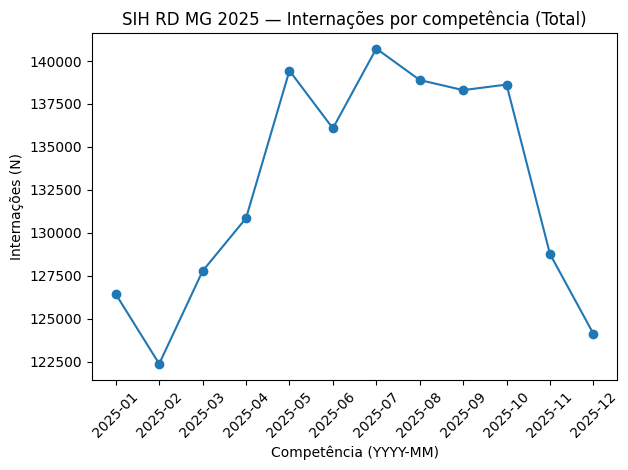

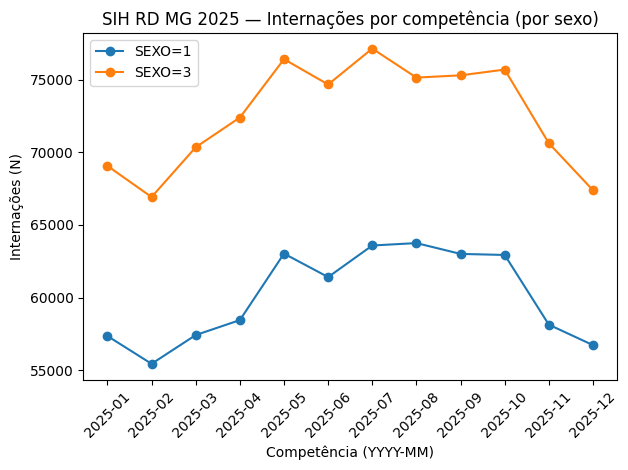

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# garante ordem cronológica
serie_total_plot = serie_total.sort_values("COMP")
serie_sexo_plot = serie_sexo.sort_values(["COMP","SEXO"])

plt.figure()
plt.plot(serie_total_plot["COMP"], serie_total_plot["N"], marker="o")
plt.xticks(rotation=45)
plt.title("SIH RD MG 2025 — Internações por competência (Total)")
plt.xlabel("Competência (YYYY-MM)")
plt.ylabel("Internações (N)")
plt.tight_layout()
plt.show()

# por sexo (linhas separadas)
pivot = serie_sexo_plot.pivot(index="COMP", columns="SEXO", values="N").sort_index()

plt.figure()
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker="o", label=f"SEXO={col}")
plt.xticks(rotation=45)
plt.title("SIH RD MG 2025 — Internações por competência (por sexo)")
plt.xlabel("Competência (YYYY-MM)")
plt.ylabel("Internações (N)")
plt.legend()
plt.tight_layout()
plt.show()

Top 10 DIAG_PRINC: ['O800', 'J189', 'Z302', 'N390', 'I64', 'J159', 'A419', 'I219', 'O829', 'O820']


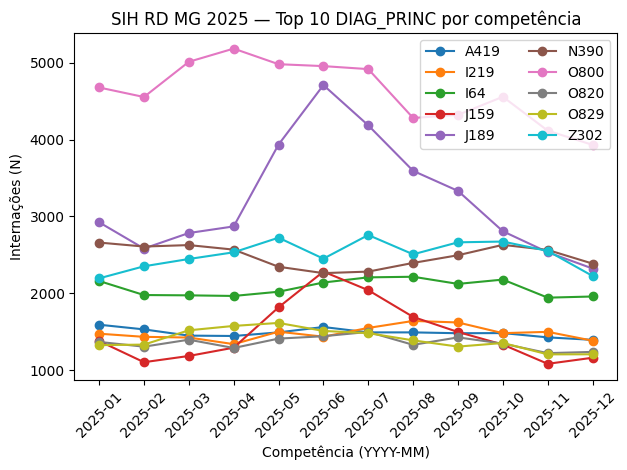

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Top 10 diagnósticos do ano
top10 = df_all["DIAG_PRINC"].value_counts(dropna=True).head(10).index.tolist()
print("Top 10 DIAG_PRINC:", top10)

# série mensal (pivot COMP x DIAG)
s = (
    df_all[df_all["DIAG_PRINC"].isin(top10)]
    .groupby(["COMP", "DIAG_PRINC"])
    .size()
    .rename("N")
    .reset_index()
)

pivot = s.pivot(index="COMP", columns="DIAG_PRINC", values="N").fillna(0).sort_index()

plt.figure()
for diag in pivot.columns:
    plt.plot(pivot.index, pivot[diag], marker="o", label=diag)

plt.xticks(rotation=45)
plt.title("SIH RD MG 2025 — Top 10 DIAG_PRINC por competência")
plt.xlabel("Competência (YYYY-MM)")
plt.ylabel("Internações (N)")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()

,COMP,TOTAL,SEM_OBST,OBST_N,OBST_%
0,2025-01,126429,111083,15346,12.1
1,2025-02,122372,107603,14769,12.1
2,2025-03,127776,111320,16456,12.9
3,2025-04,130850,114423,16427,12.6
4,2025-05,139441,123046,16395,11.8
5,2025-06,136082,120265,15817,11.6
6,2025-07,140725,124481,16244,11.5
7,2025-08,138895,124332,14563,10.5
8,2025-09,138307,123670,14637,10.6
9,2025-10,138630,123481,15149,10.9


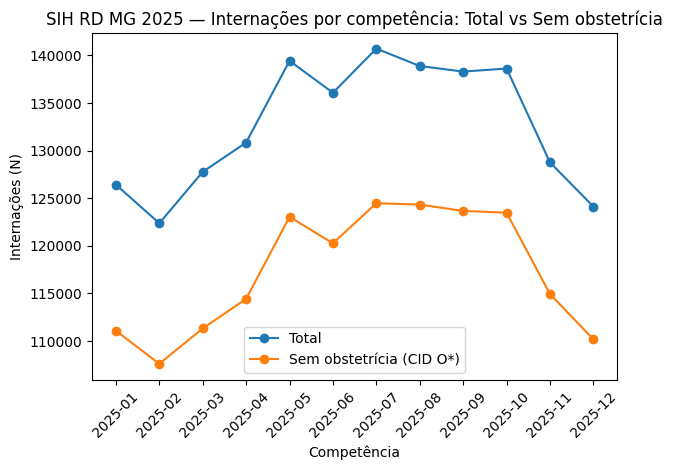

,COMP,Sem_obst_total,J_total,J_%
0,2025-01,111083,11965,10.8
1,2025-02,107603,10849,10.1
2,2025-03,111320,11617,10.4
3,2025-04,114423,13316,11.6
4,2025-05,123046,17776,14.4
5,2025-06,120265,19840,16.5
6,2025-07,124481,18140,14.6
7,2025-08,124332,15272,12.3
8,2025-09,123670,14192,11.5
9,2025-10,123481,12606,10.2


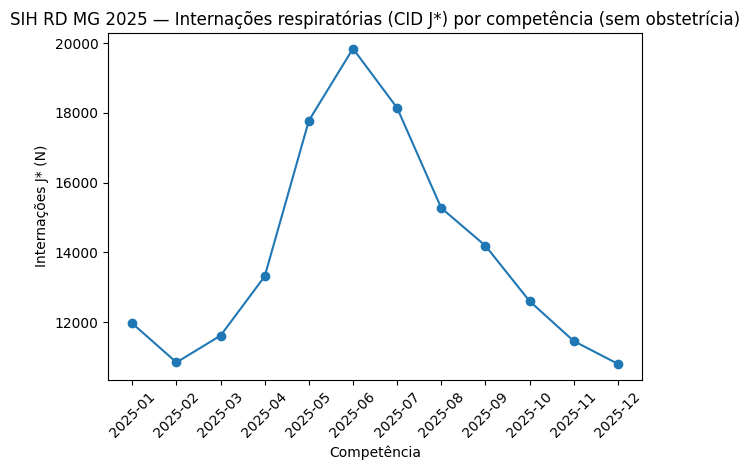

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) marcar obstetrícia por CID-10 começar com "O"
df_all["CID1"] = df_all["DIAG_PRINC"].astype(str).str.strip().str[:1]
df_all["OBST"] = (df_all["CID1"] == "O")

# 2) série total vs sem obstetrícia
s_total = df_all.groupby("COMP").size().rename("TOTAL").reset_index()
s_no_obst = df_all[~df_all["OBST"]].groupby("COMP").size().rename("SEM_OBST").reset_index()

serie2 = s_total.merge(s_no_obst, on="COMP").sort_values("COMP")
serie2["OBST_N"] = serie2["TOTAL"] - serie2["SEM_OBST"]
serie2["OBST_%"] = (serie2["OBST_N"] / serie2["TOTAL"] * 100).round(1)

display(serie2)

# 3) gráfico: total vs sem obstetrícia
plt.figure()
plt.plot(serie2["COMP"], serie2["TOTAL"], marker="o", label="Total")
plt.plot(serie2["COMP"], serie2["SEM_OBST"], marker="o", label="Sem obstetrícia (CID O*)")
plt.xticks(rotation=45)
plt.title("SIH RD MG 2025 — Internações por competência: Total vs Sem obstetrícia")
plt.xlabel("Competência")
plt.ylabel("Internações (N)")
plt.legend()
plt.tight_layout()
plt.show()

# 4) respiratório (J*) dentro do "sem obstetrícia"
df_no = df_all[~df_all["OBST"]].copy()
df_no["CID_LETRA"] = df_no["DIAG_PRINC"].astype(str).str.strip().str[:1]

resp = df_no[df_no["CID_LETRA"] == "J"].groupby("COMP").size().rename("J_total").reset_index()
base = df_no.groupby("COMP").size().rename("Sem_obst_total").reset_index()

resp2 = base.merge(resp, on="COMP", how="left").fillna(0).sort_values("COMP")
resp2["J_%"] = (resp2["J_total"] / resp2["Sem_obst_total"] * 100).round(1)

display(resp2)

plt.figure()
plt.plot(resp2["COMP"], resp2["J_total"], marker="o")
plt.xticks(rotation=45)
plt.title("SIH RD MG 2025 — Internações respiratórias (CID J*) por competência (sem obstetrícia)")
plt.xlabel("Competência")
plt.ylabel("Internações J* (N)")
plt.tight_layout()
plt.show()

✅ ITU (N390) — internações: 29810


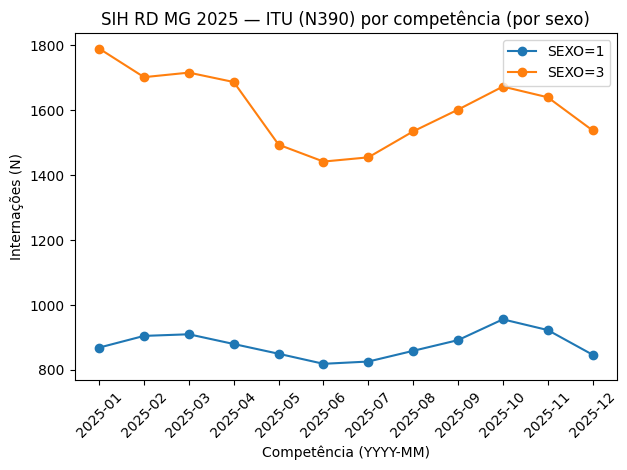

🔎 Colunas candidatas de idade: ['IDADE']
🎯 IDADE_NUM nulos: 0 de 29810


/tmp/ipython-input-650858699.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_itu.groupby(["FAIXA","SEXO"])


,FAIXA,SEXO,N
0,<1,1,9
1,<1,3,31
2,1-4,1,421
3,1-4,3,718
4,5-9,1,249
5,5-9,3,468
6,10-19,1,225
7,10-19,3,1218
8,20-39,1,699
9,20-39,3,4029


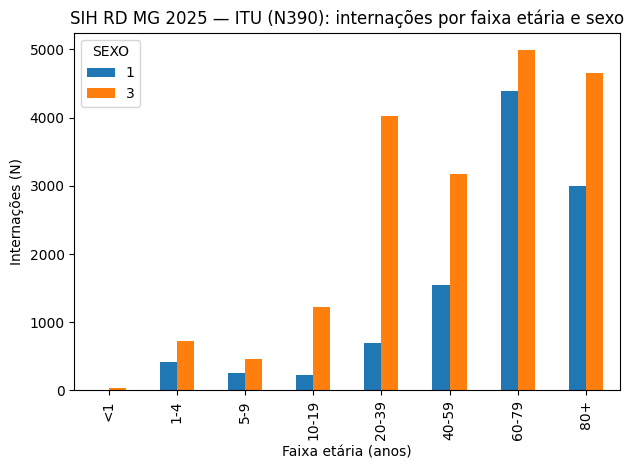

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Garantir DIAG_PRINC limpo
df_all["DIAG_PRINC"] = df_all["DIAG_PRINC"].astype(str).str.strip()

# 2) Filtrar ITU (N390)
df_itu = df_all[df_all["DIAG_PRINC"] == "N390"].copy()
print("✅ ITU (N390) — internações:", len(df_itu))

# 3) Série mensal por sexo
itu_mes_sexo = (
    df_itu.groupby(["COMP","SEXO"])
    .size().rename("N")
    .reset_index()
    .sort_values(["COMP","SEXO"])
)

# Pivot para plotar
pivot = itu_mes_sexo.pivot(index="COMP", columns="SEXO", values="N").fillna(0).sort_index()

plt.figure()
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], marker="o", label=f"SEXO={col}")
plt.xticks(rotation=45)
plt.title("SIH RD MG 2025 — ITU (N390) por competência (por sexo)")
plt.xlabel("Competência (YYYY-MM)")
plt.ylabel("Internações (N)")
plt.legend()
plt.tight_layout()
plt.show()

# 4) Idade: tentar descobrir qual coluna existe
# (no SIH RD, a idade pode vir como IDADE + COD_IDADE, ou já em anos dependendo do layout)
cols_idade = [c for c in df_itu.columns if c.upper() in ("IDADE","IDADEPAC","IDADE_PAC","IDADE_ANOS")]
print("🔎 Colunas candidatas de idade:", cols_idade)

if "IDADE" in df_itu.columns:
    # Tenta interpretar IDADE como numérica direta (muitos layouts já trazem em anos)
    df_itu["IDADE_NUM"] = pd.to_numeric(df_itu["IDADE"], errors="coerce")
else:
    df_itu["IDADE_NUM"] = np.nan

print("🎯 IDADE_NUM nulos:", int(df_itu["IDADE_NUM"].isna().sum()), "de", len(df_itu))

# 5) Faixas etárias (ajustáveis)
bins = [-1, 0, 4, 9, 19, 39, 59, 79, 200]
labels = ["<1","1-4","5-9","10-19","20-39","40-59","60-79","80+"]

df_itu["FAIXA"] = pd.cut(df_itu["IDADE_NUM"], bins=bins, labels=labels)

tab_faixa_sexo = (
    df_itu.groupby(["FAIXA","SEXO"])
    .size().rename("N")
    .reset_index()
    .sort_values(["FAIXA","SEXO"])
)

display(tab_faixa_sexo)

# gráfico barras (faixa etária x sexo)
pivot2 = tab_faixa_sexo.pivot(index="FAIXA", columns="SEXO", values="N").fillna(0)

pivot2.plot(kind="bar")
plt.title("SIH RD MG 2025 — ITU (N390): internações por faixa etária e sexo")
plt.xlabel("Faixa etária (anos)")
plt.ylabel("Internações (N)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3511718294.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_itu.groupby(["FAIXA","SEXO"])


,FAIXA,SEXO,N
0,<1,1,9
1,<1,3,31
2,1-4,1,421
3,1-4,3,718
4,5-9,1,249
5,5-9,3,468
6,10-19,1,225
7,10-19,3,1218
8,20-39,1,699
9,20-39,3,4029


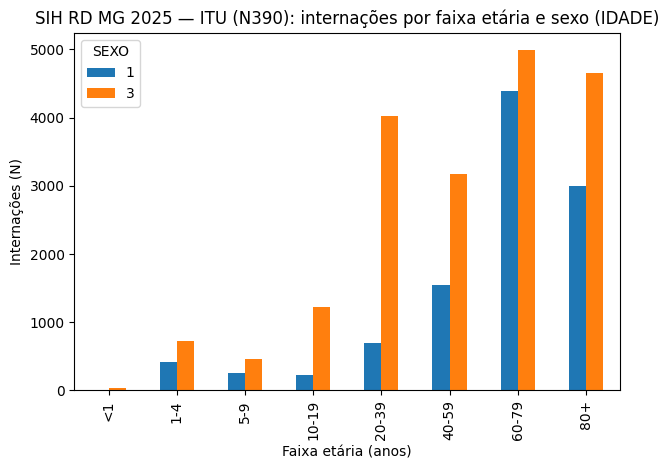

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# usar IDADE direto (já está em anos e completa)
df_all["DIAG_PRINC"] = df_all["DIAG_PRINC"].astype(str).str.strip()
df_itu = df_all[df_all["DIAG_PRINC"] == "N390"].copy()

df_itu["IDADE_ANOS"] = pd.to_numeric(df_itu["IDADE"], errors="coerce")

bins = [-1, 0, 4, 9, 19, 39, 59, 79, 200]
labels = ["<1","1-4","5-9","10-19","20-39","40-59","60-79","80+"]

df_itu["FAIXA"] = pd.cut(df_itu["IDADE_ANOS"], bins=bins, labels=labels)

tab = (
    df_itu.groupby(["FAIXA","SEXO"])
    .size().rename("N")
    .reset_index()
    .sort_values(["FAIXA","SEXO"])
)

display(tab)

pivot = tab.pivot(index="FAIXA", columns="SEXO", values="N").fillna(0)
pivot.plot(kind="bar")
plt.title("SIH RD MG 2025 — ITU (N390): internações por faixa etária e sexo (IDADE)")
plt.xlabel("Faixa etária (anos)")
plt.ylabel("Internações (N)")
plt.tight_layout()
plt.show()

In [15]:
import pandas as pd
import numpy as np

df_all["DIAG_PRINC"] = df_all["DIAG_PRINC"].astype(str).str.strip()

# total de internações por município (denominador interno do SIH)
tot_mun = df_all.groupby("MUNIC_RES").size().rename("TOTAL_MUN")

# ITU por município (numerador)
itu_mun = df_all[df_all["DIAG_PRINC"] == "N390"].groupby("MUNIC_RES").size().rename("ITU_N390")

tab_mun = pd.concat([tot_mun, itu_mun], axis=1).fillna(0)
tab_mun["ITU_N390"] = tab_mun["ITU_N390"].astype(int)
tab_mun["TOTAL_MUN"] = tab_mun["TOTAL_MUN"].astype(int)

# taxa por 100 mil internações (não é por população, mas é ótimo para ranking)
tab_mun["ITU_por_100k_intern"] = (tab_mun["ITU_N390"] / tab_mun["TOTAL_MUN"] * 100000).round(1)

# filtros mínimos pra evitar município com pouquíssimas internações distorcer a taxa
tab_mun_filtrado = tab_mun[tab_mun["TOTAL_MUN"] >= 2000].copy()

# Top 20 por contagem e por taxa
top20_cont = tab_mun_filtrado.sort_values("ITU_N390", ascending=False).head(20)
top20_taxa  = tab_mun_filtrado.sort_values("ITU_por_100k_intern", ascending=False).head(20)

print("🏙️ Top 20 municípios por CONTAGEM de ITU (N390):")
display(top20_cont.reset_index())

print("📊 Top 20 municípios por 'taxa' (ITU por 100k internações) — com TOTAL_MUN>=2000:")
display(top20_taxa.reset_index())


🏙️ Top 20 municípios por CONTAGEM de ITU (N390):


,MUNIC_RES,TOTAL_MUN,ITU_N390,ITU_por_100k_intern
0,310620,160983,2243,1393.3
1,317020,61552,1348,2190.0
2,314330,36282,623,1717.1
3,313670,41174,618,1500.9
4,317010,24355,455,1868.2
5,315780,15473,292,1887.2
6,311860,32657,264,808.4
7,313130,13631,257,1885.4
8,314800,12846,253,1969.5
9,315460,20043,250,1247.3


📊 Top 20 municípios por 'taxa' (ITU por 100k internações) — com TOTAL_MUN>=2000:


,MUNIC_RES,TOTAL_MUN,ITU_N390,ITU_por_100k_intern
0,311930,2742,233,8497.4
1,315990,2103,124,5896.3
2,314410,2131,122,5725.0
3,316290,2228,121,5430.9
4,311440,2225,113,5078.7
5,315220,3544,174,4909.7
6,311840,2900,141,4862.1
7,315960,3419,160,4679.7
8,311660,3948,174,4407.3
9,316200,2435,105,4312.1
